<a href="https://colab.research.google.com/github/sampritich/datasets/blob/master/TimeSeries_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/uwmbrcqnowrlltx/Time_series_end_To_end.zip

--2020-01-20 05:09:03--  https://www.dropbox.com/s/uwmbrcqnowrlltx/Time_series_end_To_end.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uwmbrcqnowrlltx/Time_series_end_To_end.zip [following]
--2020-01-20 05:09:03--  https://www.dropbox.com/s/raw/uwmbrcqnowrlltx/Time_series_end_To_end.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7a93a8ffc3824880b0f0de0f91.dl.dropboxusercontent.com/cd/0/inline/AwhuvPt95epirr7ctacR9mmSfYLTHvzMtm8F67xSbFvbbcmARB3CHMz6Q6jN30zPR71AAlakJw6GGBh31XACWfGX_rLs2O-wOMC7-DaVoLJTSfURbO8HVECEQLUxzrDBMmE/file# [following]
--2020-01-20 05:09:04--  https://uc7a93a8ffc3824880b0f0de0f91.dl.dropboxusercontent.com/cd/0/inline/AwhuvPt95epirr7ctacR9mmSfYLTHvzMtm8F67xSbFvbbcmARB3CHMz6Q6jN30zPR71AAlak

In [2]:
!unzip Time_series_end_To_end.zip

Archive:  Time_series_end_To_end.zip
  inflating: Time_series_end_To_end/ICICIBANK_v8qqcf.csv  
  inflating: Time_series_end_To_end/SeaPlaneTravel_jc4i8h.csv  
  inflating: Time_series_end_To_end/Timeseries_Analysis_ugbgil.ipynb  


#Load the dataset
#convert month column into parsedate
#print data.head()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("/content/Time_series_end_To_end/SeaPlaneTravel_jc4i8h.csv",parse_dates= True,index_col="Month")
data

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121
...,...
2015-08-01,606
2015-09-01,508
2015-10-01,461


In [5]:
data.columns = ['Passenger_list']
data.head()

,Passenger_list
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


#Make month as index
#Plot the data

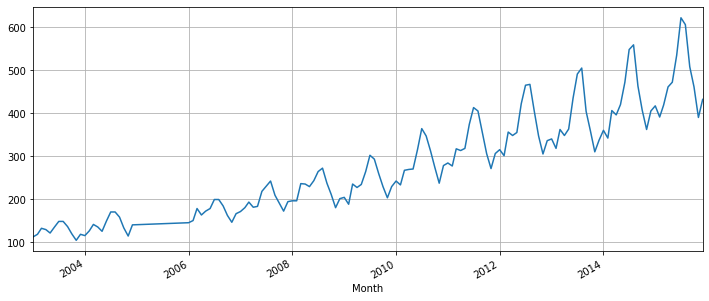

In [6]:
data.Passenger_list.plot(figsize=(12, 5), grid=True)
plt.show()

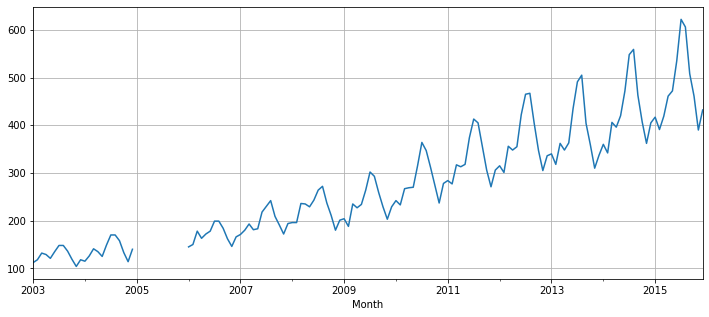

In [7]:
d_resampled  = data.Passenger_list.resample('M').mean()
d_resampled.plot(figsize=(12, 5), grid=True)
plt.show()

In [8]:
data_rolling=data.Passenger_list.rolling(3).mean()
data_rolling.head()

Month
2003-01-01           NaN
2003-02-01           NaN
2003-03-01    120.666667
2003-04-01    126.333333
2003-05-01    127.333333
Name: Passenger_list, dtype: float64

In [9]:
data['roll_mean'] = data.Passenger_list.rolling(5).mean()
data.loc[:, ['roll_mean', 'Passenger_list']].head(10)

,roll_mean,Passenger_list
Month,,
2003-01-01,NaN,112
2003-02-01,NaN,118
2003-03-01,NaN,132
2003-04-01,NaN,129
2003-05-01,122.4,121
2003-06-01,127.0,135
2003-07-01,133.0,148
2003-08-01,136.2,148
2003-09-01,137.6,136


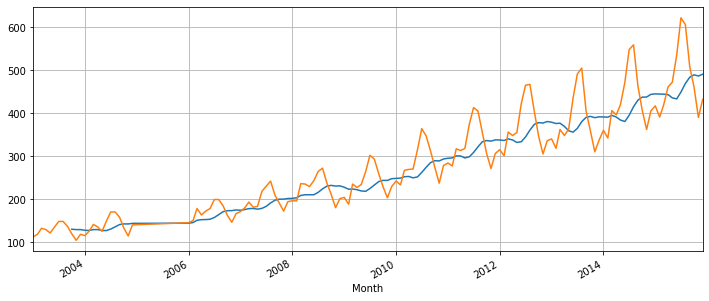

In [10]:
data_rolling2  = data.Passenger_list.rolling(10).mean()
data_rolling2.plot(figsize=(12, 5), grid=True)
data.Passenger_list.plot(figsize=(12, 5), grid=True)
plt.show()

In [0]:
from statsmodels.tsa.stattools import adfuller

In [12]:
d_resampled.dropna()

Month
2003-01-31    112.0
2003-02-28    118.0
2003-03-31    132.0
2003-04-30    129.0
2003-05-31    121.0
              ...  
2015-08-31    606.0
2015-09-30    508.0
2015-10-31    461.0
2015-11-30    390.0
2015-12-31    432.0
Name: Passenger_list, Length: 144, dtype: float64

In [13]:
adfuller(data.Passenger_list)

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

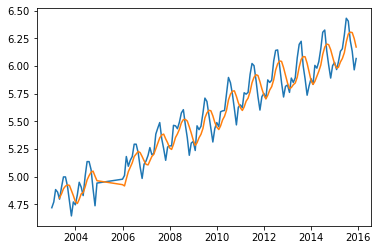

In [14]:
#ts=d_resampled
ts_log = np.log(data)
plt.plot(ts_log)

In [15]:
adfuller(ts_log.Passenger_list)

(-1.7170170891069605,
 0.42236677477039125,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 -445.3990312497209)

In [16]:
data.Passenger_list

Month
2003-01-01    112
2003-02-01    118
2003-03-01    132
2003-04-01    129
2003-05-01    121
             ... 
2015-08-01    606
2015-09-01    508
2015-10-01    461
2015-11-01    390
2015-12-01    432
Name: Passenger_list, Length: 144, dtype: int64

In [0]:
stationary_d=data.Passenger_list.diff().diff().dropna()

In [18]:
adfuller(data.Passenger_list.diff().diff().dropna())

(-16.384231542468495,
 2.7328918500143186e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 988.6020417275602)

In [0]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [0]:
d_resampled.diff().dropna()
from statsmodels.tsa.arima_model import ARMA

In [21]:
model = ARMA(stationary_d, order=(1, 2))
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         Passenger_list   No. Observations:                  142
Model:                     ARMA(1, 2)   Log Likelihood                -691.954
Method:                       css-mle   S.D. of innovations             31.067
Date:                Mon, 20 Jan 2020   AIC                           1393.908
Time:                        05:09:18   BIC                           1408.688
Sample:                             0   HQIC                          1399.914
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0034      0.080      0.043      0.966      -0.152       0.159
ar.L1.Passenger_list    -0.4709      0.116     -4.048      0.000      -0.699      -0.243
ma.L1.Passenger_list    -0.1369      0.074     -1.843      0.067      -0.283       0.009
ma.L2.Passenger_list    -0.8631      0.074    -11.701      0.000      -1.008      -0.718
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1238           +0.0000j            2.1238            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1587           +0.0000j            1.1587            0.5000
-----------------------------------------------------------------------------
"""

In [22]:
d_resampled

Month
2003-01-31    112.0
2003-02-28    118.0
2003-03-31    132.0
2003-04-30    129.0
2003-05-31    121.0
              ...  
2015-08-31    606.0
2015-09-30    508.0
2015-10-31    461.0
2015-11-30    390.0
2015-12-31    432.0
Freq: M, Name: Passenger_list, Length: 156, dtype: float64

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model = ARIMA(data.Passenger_list, order=(2, 1, 1))  
results_ARIMA = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Passenger_list   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.882
Date:                Mon, 20 Jan 2020   AIC                           1361.696
Time:                        05:09:18   BIC                           1376.510
Sample:                             1   HQIC                          1367.716
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6695      0.132     20.183      0.000       2.410       2.929
ar.L1.D.Passenger_list     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.Passenger_list    -0.5103      0.072     -7.094      0.000      -0.651      -0.369
ma.L1.D.Passenger_list    -0.9999      0.029    -34.136      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0819           -0.8882j            1.3998           -0.1094
AR.2            1.0819           +0.8882j            1.3998            0.1094
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
results_ARIMA.forecast()

(array([470.45446119]),
 array([26.88163437]),
 array([[417.76742597, 523.1414964 ]]))

In [27]:
predictions = []
for x in np.arange(-5, 0):
    model = ARIMA(data.Passenger_list.iloc[:x], order=(3, 1, 3))  
    results_ARIMA = model.fit()
    predictions.append(results_ARIMA.forecast()[0])
predictions=np.array(predictions).ravel()
predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

array([600.24291687, 557.8770135 , 445.11356001, 433.67072522,
       358.63111709])

In [28]:
actual = d_resampled.tail()
actual

Month
2015-08-31    606.0
2015-09-30    508.0
2015-10-31    461.0
2015-11-30    390.0
2015-12-31    432.0
Freq: M, Name: Passenger_list, dtype: float64

In [29]:
predictions_series = pd.Series(predictions, index = actual.index)
predictions_series

Month
2015-08-31    600.242917
2015-09-30    557.877014
2015-10-31    445.113560
2015-11-30    433.670725
2015-12-31    358.631117
Freq: M, dtype: float64

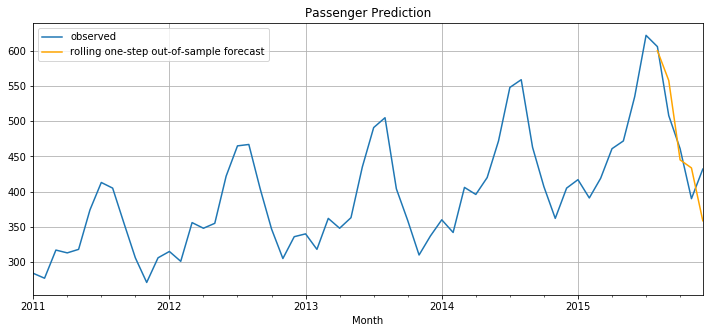

In [30]:
d_resampled[-60:].plot(figsize=(12, 5), grid=True, label= 'observed')
predictions_series.plot(c='orange', figsize=(12, 5), grid=True, label='rolling one-step out-of-sample forecast')
plt.title('Passenger Prediction')
plt.legend()
plt.show()